# ARIMA model on Temperature Data of Kathmandu

In [ ]:

import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
def parser(x):
    return datetime.strptime(x,'%Y-%m')

temp = pd.read_csv('Desktop/monthly-mean-temp.csv',index_col= 0, parse_dates=[0], date_parser=parser)


In [3]:
temp.head()

,Temperature
Month,
2002-01-01,19.0
2002-02-01,22.7
2002-03-01,25.2
2002-04-01,27.1
2002-05-01,27.3


In [4]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2002-01-01 to 2014-12-01
Data columns (total 1 columns):
Temperature    156 non-null float64
dtypes: float64(1)
memory usage: 2.4 KB


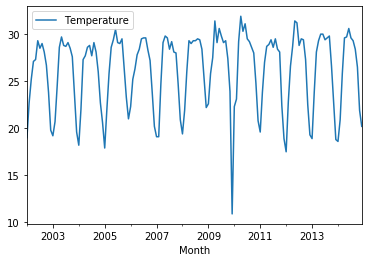

In [5]:
temp.plot()

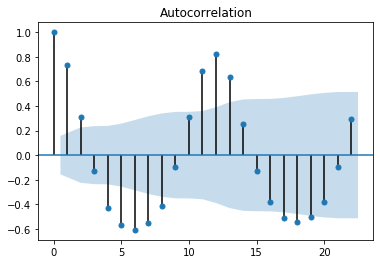

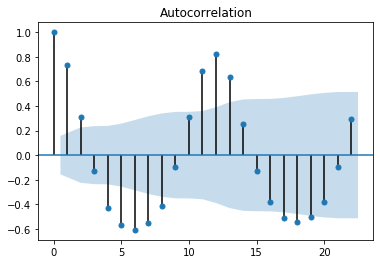

In [35]:
plot_acf(temp)

In [7]:
##converting series into stationarity

In [8]:
temp.head()

,Temperature
Month,
2002-01-01,19.0
2002-02-01,22.7
2002-03-01,25.2
2002-04-01,27.1
2002-05-01,27.3


In [9]:
temp_diff = temp.diff(periods=1)
temp_diff = temp_diff[1:]
temp_diff.head()

,Temperature
Month,
2002-02-01,3.7
2002-03-01,2.5
2002-04-01,1.9
2002-05-01,0.2
2002-06-01,2.0


Autocorrelation on temp data


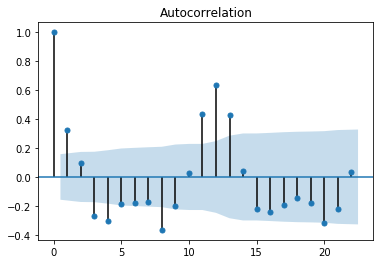

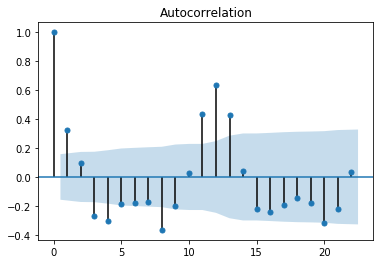

In [10]:
plot_acf(temp_diff)

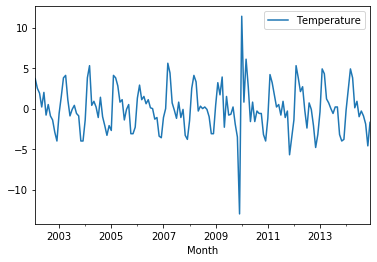

In [11]:
temp_diff.plot()

Train and test spliting

In [12]:
x = temp.values
train = x[0:117]  #train data=117
test = x[117:]    #test data=39
predictions = []

AR model creation

In [13]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [14]:
predictions = model_ar_fit.predict(start=117,end=156)

# Prediction using AR model

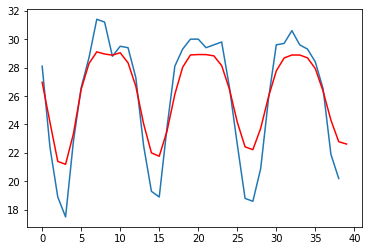

In [15]:
plt.plot(test)
plt.plot(predictions, color='red')

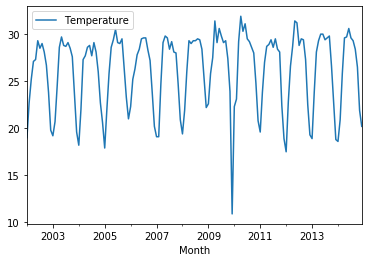

In [16]:
temp.plot()

# ARIMA model

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
model_arima = ARIMA(train,order=(5,0,7))
model_arima_fit = model_arima.fit()

In [33]:
predictions_arima = model_arima_fit.forecast(steps=39)[0]
predictions_arima

array([26.07150347, 22.35970205, 19.77549727, 20.31517884, 23.51395144,
       27.41500919, 29.540026  , 29.69540599, 28.94341971, 28.89356978,
       29.17744293, 28.60188595, 25.93328402, 22.27643751, 19.74838006,
       20.40559049, 23.68571637, 27.562361  , 29.63046673, 29.71713651,
       28.94900134, 28.87456657, 29.12543113, 28.47334178, 25.76950427,
       22.13615286, 19.72630155, 20.50152301, 23.85843435, 27.70917265,
       29.71749211, 29.73693277, 28.95142765, 28.85345619, 29.06961718,
       28.34345164, 25.60589042, 22.00069902, 19.7093873 ])

# Prediction using ARIMA model

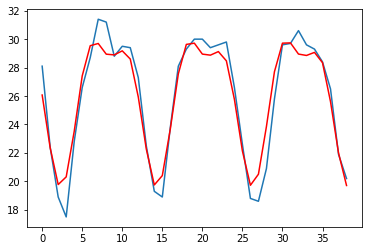

In [34]:
plt.plot(test)
plt.plot(predictions_arima, color='red')

find out the effictive value of ARIMA parameter ( p, d, q)

In [36]:
import itertools
p=d=q=range(0,9)
pdq = list(itertools.product(p,d,q))

# Function to find out best (p, d, q) with lowest value of aic

In [31]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue

(0, 0, 0) 649.033918972538
(0, 0, 1) 582.8456475127596
(0, 0, 3) 537.5906522115965
(0, 0, 4) 538.8561761887809
(0, 0, 5) 541.9509830809344
(0, 0, 7) 530.3023579443438
(0, 0, 8) 528.8739179155882
(0, 1, 0) 572.6327128208814
(0, 1, 1) 569.388094678021
(0, 1, 2) 563.7007655724653
(0, 1, 3) 564.3418765442506
(0, 1, 4) 537.2900258711956
(0, 1, 5) 538.5324550039176
(0, 1, 6) 540.5301617330063
(0, 1, 7) 520.3160597871279
(0, 2, 0) 616.8196332953345
(0, 2, 1) 575.3931625802179
(0, 2, 2) 571.8517167117006
(0, 2, 3) 565.6200848199867
(1, 0, 0) 564.1092127471314
(1, 0, 1) 555.3608003707047
(1, 0, 2) 541.2045089997545
(1, 0, 3) 549.8918975998226
(1, 0, 4) 535.713091386243
(1, 0, 5) 534.9719818666152
(1, 0, 6) 534.1527899037994
(1, 0, 7) 535.8715920869275
(1, 0, 8) 537.2593845952267
(1, 1, 0) 568.1447634929127
(1, 1, 2) 554.9737019015113
(1, 1, 4) 538.7569815270825
(1, 2, 0) 597.7088775709503
(1, 2, 2) 572.3241797566591
(2, 0, 0) 543.302783790132
(2, 0, 1) 517.103531857269
(2, 0, 2) 517.87757576739